In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
from scipy.stats import norm
import scipy.stats as stats
import pylab as pl
from datetime import datetime

belmont = pd.read_csv("belmont.csv", sep = ';', decimal= ",")

In [2]:
belmont.head()

,Year,Winner,Jockey,Trainer,Owner,Time,Miliseconds,Track,miles,Unnamed: 9
0,2016,Creator,"Irad Ortiz, Jr",Steve Asmussen,WinStar Farm LLC,2:28.51,148.51,Belmont,01. Mai,28.0
1,2015,American Pharoah,Victor Espinoza,Bob Baffert,"Zayat Stables, LLC",2:26.65,146.65,Belmont,01. Mai,NaN
2,2014,Tonalist,Joel Rosario,Christophe Clement,Robert S. Evans,2:28.52,148.52,Belmont,01. Mai,NaN
3,2013,Palace Malice,Mike Smith,Todd Pletcher,Dogwood Stable,2:30.70,150.70,Belmont,01. Mai,NaN
4,2012,Union Rags,John Velazquez,Michael Matz,Phyllis M. Wyeth,2:30.42,150.42,Belmont,01. Mai,NaN


Convert column "Time" to milliseconds as well as seconds. The existing column "Miliseconds" should be renamed to "Seconds".

In [3]:
def convertTimeToMilliseconds(time):
    """Convert datetime.time to milliseconds"""
    return time.minute * 6e4 + time.second * 1e3 + time.microsecond * 1e-3

def convertTimeToSeconds(time):
    """Convert datetime.time to seconds and round to three decimal places"""
    return round(convertTimeToMilliseconds(time) * 1e-3, 3)

# convert column "Time" to milliseconds and seconds
milliseconds = np.array([convertTimeToMilliseconds(t) for t in pd.to_datetime(belmont['Time'], format='%M:%S.%f').dt.time])
seconds = np.array([convertTimeToMilliseconds(t) for t in pd.to_datetime(belmont['Time'], format='%M:%S.%f').dt.time])

# print the result
print(f'milliseconds: {milliseconds}')
print(f'seconds: {seconds}')

milliseconds: [148510. 146650. 148520. 150700. 150420. 150880. 151570. 147540. 149650.
 148740. 147860. 148750. 147500. 148260. 149710. 146560. 151190. 147880.
 149160. 148820. 148960. 152020. 146820. 149970. 146130. 148100. 147200.
 146000. 146400. 148200. 149800. 147000. 147200. 147800. 148200. 149000.
 149800. 148600. 146800. 149600. 149000. 148200. 149200. 144000. 148000.
 150400. 154000. 148800. 147200. 148800. 149600. 148400. 148400. 150200.
 148800. 149200. 149200. 148400. 150200. 146600. 149800. 149000. 150800.
 148600. 150200. 149000. 148600. 150200. 148200. 149400. 150800. 150200.
 152200. 148200. 149200. 151000. 149600. 149600. 149400. 148600. 150000.
 150600. 149200. 152600. 152800. 149600. 151600. 152800. 153200. 152400.
 152200.]
seconds: [148510. 146650. 148520. 150700. 150420. 150880. 151570. 147540. 149650.
 148740. 147860. 148750. 147500. 148260. 149710. 146560. 151190. 147880.
 149160. 148820. 148960. 152020. 146820. 149970. 146130. 148100. 147200.
 146000. 146400. 1

Find outliers for the calculated milliseconds via a boxplot:

outliers: [144000.0, 154000.0]


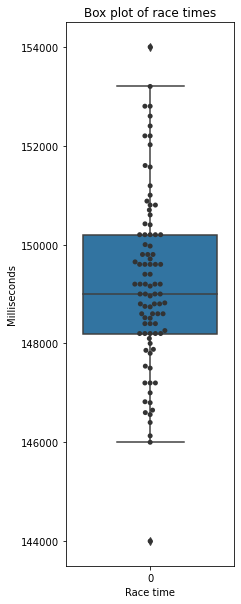

In [4]:
# finding the 1st quartile
q1 = np.quantile(milliseconds, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(milliseconds, 0.75)
med = np.median(milliseconds)
 
# finding the iqr region
iqr = q3 - q1
 
# finding upper and lower whiskers
upper_bound = q3 + (1.5 * iqr)
lower_bound = q1 - (1.5 * iqr)

# find the outliers using the lower und upper bound
outliers = milliseconds[(milliseconds < lower_bound) | (milliseconds > upper_bound)]

# print the outliers
print(f'outliers: {outliers.tolist()}')

# show the result as a swarm box plot
fig, ax = plt.subplots(figsize=(3, 10))
_ = sns.boxplot(data=milliseconds, ax=ax)
_ = sns.swarmplot(data=milliseconds, ax=ax,color=".2")
_ = ax.set_title('Box plot of race times')
_ = ax.set_xlabel('Race time')
_ = ax.set_ylabel('Milliseconds')

**Excersice for exponential distribution**: When can we expect a horse in the future that is as fast or faster than Secretariat?

In [5]:
# Loading additional data with all the races that the horse secretariat has completed.
# source: https://www.horseracingnation.com/horse/Secretariat
secretariat = pd.read_csv("secretariat.csv", sep = ';')
secretariat.head()

,Date,Horse,Fin,Track,Distance,Sf,Race,Cnd,1st,2nd,3rd,Time
0,10/28/1973,Secretariat,1st,WO,1 5/8 m,T,Canadian International -G1,3+,Secretariat,Big Spruce,Golden Don,2:41.80
1,10/08/1973,Secretariat,1st,Bel,1 1/2m,T,Man O' War Stakes-G1,3+,Secretariat,Tentam,Big Spruce,2:24.80
2,09/29/1973,Secretariat,2nd,Bel,1 1/2m,D,Woodward-G1,3+,Prove Out,Secretariat,Cougar II,2:25.80
3,09/15/1973,Secretariat,1st,Bel,1 1/8 m,D,Marlboro Cup Invitational Handicap-G1,3+,Secretariat,Riva Ridge,Cougar II,1:45.40
4,08/04/1973,Secretariat,2nd,Sar,1 1/8 m,D,Whitney-G2,3+,Onion,Secretariat,Rule By Reason,1:49.20


In [6]:
# Get all 1st places of secretariat
firstPlacesOfSecretariat = secretariat[secretariat["Fin"] == "1st"]

# Format the date column
secretariat["Date"] = pd.to_datetime(secretariat["Date"], format='%m/%d/%Y')

# Calculate the time range of the 1st place wins
timeRangeInYears = round((secretariat['Date'].max() - secretariat['Date'].min()) / np.timedelta64(1, 'Y'), 2)

# Calculate the mean of won races per year
wonRacesInOneYear = round(len(firstPlacesOfSecretariat) / timeRangeInYears, 2)

# Output of the found values
print(f'Secretariat made the 1st place in {len(firstPlacesOfSecretariat)} races within {timeRangeInYears} years.')
print(f'This equals to {wonRacesInOneYear} won races in a one year period.')

Secretariat made the 1st place in 16 races within 1.32 years.
This equals to 12.12 won races in a one year period.


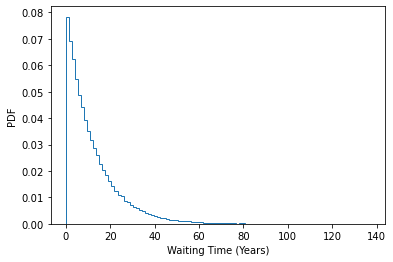

In [7]:
# Draw samples of waiting years
waitingYears = np.random.exponential(wonRacesInOneYear, size=100000)

# Make the histogram
_ = plt.hist(waitingYears, bins=100, histtype='step', density=True)

# Label axes
_ = plt.xlabel('Waiting Time (Years)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

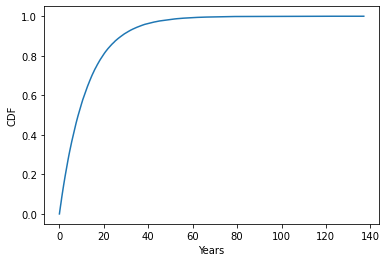

With a probability of 80 percent we see a horse that is as fast or faster than secretariat in 19.5 years.
With a probability of 90 percent we see a horse that is as fast or faster than secretariat in 27.9 years.
With a probability of 95 percent we see a horse that is as fast or faster than secretariat in 36.1 years.
With a probability of 99 percent we see a horse that is as fast or faster than secretariat in 55.7 years.


In [8]:
def cdf(df):
    """Cumulative distribution function."""
    sq = df.value_counts()
    return sq.sort_index().cumsum()*1./len(sq)

# Calculate the cdf
cd = cdf(pd.DataFrame(waitingYears))

# Make the plot
_ = plt.plot(cd.index.tolist(), cd.tolist())
_ = plt.ylabel("CDF")
_ = plt.xlabel("Years")

# Show the plot
plt.show()

# Output of certain time spans for interesting probabilities
for p in [.8, .9, .95, .99]:
    print(
        f'With a probability of {(int)(p * 100)} percent we see a horse that is as fast or faster than secretariat in {round(cd[cd.gt(p)].index[0][0], 1)} years.')